In [2]:
# importing the file
import pandas as pd

df_ = pd.read_csv("boston.csv")
df_.head(5)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# creating two sets of data x , y 
# we used ' .values ' because sklearn doesnt woork with dataframes , so we turned dataframe to array
x = df_.drop("MEDV",axis=1).values
y = df_["MEDV"].values
print(x)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [4]:
from sklearn.model_selection import train_test_split as tts

# train data and test data

x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3,random_state = 3)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [6]:
# building a linear regressioion model

from sklearn.linear_model import LinearRegression as lr_

linreg = lr_()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

y_pred

array([38.01528515, 19.33275099, 23.42815334, 32.45798656, 24.88381158,
       23.05871157, 19.92072666,  6.04534385, 20.98855587, 17.59511583,
       12.23335034, 32.4672859 , 36.29698894, 30.70130549,  6.84957368,
       10.86025291, 23.50492483, 15.09167866, 12.90084747, 29.54045973,
       27.67059179, 36.04108386, 27.14556882, 23.40188801, 13.92689893,
       24.85961767, 20.82589624, 17.80154922, 19.95946937, 24.19978769,
       14.94714158, 34.11652732, 22.16730968, 19.14532281, 18.60598488,
       17.77100438, 22.04566941, 32.75402644, 16.46191962, 22.21145662,
       17.24126301, 10.4605279 , 25.07955816, 17.8958002 , 25.39844642,
       26.00687176, 26.2086724 , 17.47724343, 28.35025849, 20.65564879,
       23.78906008, 20.24903174, 38.14875113, 18.31290641, 24.95664125,
       10.57573588, 36.40017019, 16.27237297, 31.29406913, 20.1514513 ,
       24.05647151, 23.00571838, 32.38752186, 33.5869344 , 20.91776625,
       25.53685926, 34.17118495, 24.08201497, 28.45266299, 29.68

In [7]:
# this show the percentage of accuracy of model
linreg.score(x_test,y_test)

0.714789526557686

In [8]:
# finding how much the 29 percent differ from original
# mse (mean squared error)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

22.43193607073744

In [9]:
# calculating root mean square
from math import sqrt
rmse = sqrt(mse)
rmse  # the rms value sows how much predicted value differs from the actual

4.736236488050131

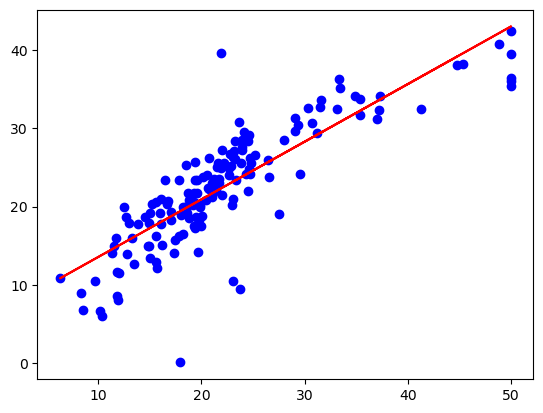

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred,color='b')

n = np.polyfit(y_test,y_pred,1)
p = np.poly1d(n)

plt.plot(y_test,p(y_test),'r')

plt.show()

In [14]:
p

poly1d([0.73531189, 6.22444761])

# Logistics regression

In [15]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [92]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [97]:
x = df.drop('Outcome',axis = 1).values
#  or deselect the columns that do not have any effect on the analysis ( skin thickness , diabetic pedegreee function)

y = df['Outcome'].values

# split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1354)

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

# checking the accuray using confusion matrix and classification report
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

cm = confusion_matrix(y_test , y_pred)

cr = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

print(cm)
print(cr)
print(acc)

[[100  19]
 [ 36  37]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       119
           1       0.66      0.51      0.57        73

    accuracy                           0.71       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.71      0.71      0.70       192

0.7135416666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 12345)
dtree.fit(x_train  , y_train)

y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.7395833333333334


In [107]:
from sklearn.ensemble import RandomForestClassifier

# calling model
rf_model = RandomForestClassifier(random_state = 12345)

#fiting the model with train data
rf_model.fit(x_train , y_train)

# predicting on train data
y_pred_train = rf_model.predict(x_train)

# predicting on test data
y_pred_test = rf_model.predict(x_test)

# finding acuracy on predictions made on train and test data
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test,y_pred_test)

# printing accuracy of train and test data
print('train accuracy ',acc_train*100,'\n')
print('test accuracy',acc_test*100)

train accuracy  100.0 

test accuracy 76.04166666666666


# KNN (k nearest neighbour)

In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [6]:
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
# bunch refers to dictionary
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
type(iris.data)

numpy.ndarray

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [15]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
x = iris.data

y = iris.target

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.40)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

y_pred.shape


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(60,)

In [19]:
knn.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test , y_pred)

cr = classification_report(y_test , y_pred)

print(cm)
print(cr)

[[21  0  0]
 [ 0 21  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# clustering or kmeans

In [21]:
import numpy as np
import pandas as pd

x_cordinates = [80.1,93.1,12.5,94.6,81.4,78.3,91.5,88.8,97.3,72.9]
y_cordinates = [96.5,72.9,84.6,75.4,93.4,86.4,81.7,76.9,99.5,82.6]

df= pd.DataFrame({'x_new':x_cordinates,'y_new':y_cordinates})

df

,x_new,y_new
0,80.1,96.5
1,93.1,72.9
2,12.5,84.6
3,94.6,75.4
4,81.4,93.4
5,78.3,86.4
6,91.5,81.7
7,88.8,76.9
8,97.3,99.5
9,72.9,82.6


In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)

model.fit(df)

label_ = model.predict(df)

print(label_)

[0 2 1 2 0 0 2 2 0 0]


In [23]:
model.cluster_centers_

array([[82.   , 91.68 ],
       [12.5  , 84.6  ],
       [92.   , 76.725]])

In [24]:
model.n_iter_

2

In [25]:
new_x= [84.6,76.2]
new_y = [97.3,89.1]

new_df = pd.DataFrame({'new_x':new_x,'new_y':new_y})
print(new_df)

   new_x  new_y
0   84.6   97.3
1   76.2   89.1


In [26]:
new_label_ = model.predict(new_df)
print(new_label_)

[0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- new_x
- new_y
Feature names seen at fit time, yet now missing:
- x_new
- y_new

  warnings.warn(message, FutureWarning)


In [58]:
#  KMeans(nc_clusters = 3 , init = 'random' , n_init = 10 , n_clusters , max_iter = 100 , random_state)

###  PCA principle compnent analysis

In [38]:
import pandas as pd
df = pd.read_csv("seed.csv")
df

,3.312,5.763
0,3.333,5.554
1,3.337,5.291
2,3.379,5.324
3,3.562,5.658
4,3.312,5.386
...,...,...
204,2.981,5.137
205,2.795,5.140
206,3.232,5.236
207,2.836,5.175


In [39]:
df =  df.values

In [40]:
# 0th index : width of grain
# 1st index col : length of grain

width = df[:,0]
length = df[:,1]

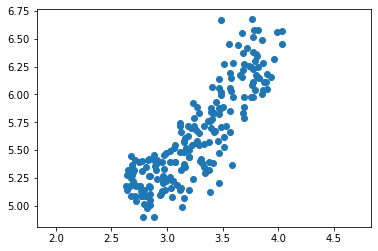

0.8604405325922294


In [41]:
import matplotlib.pyplot as plt
plt.scatter(width,length)
plt.axis('equal')
plt.show()

# pearson correleation

from scipy.stats import pearsonr
correleation , pvalue = pearsonr(width,length)

# displa the correleation
print(correleation)

In [45]:
# dcorreleate the green measurement with PCA
# import PCA
from sklearn.decomposition import PCA

# create the PCA instance
model = PCA()

# apply he fit and transform method
pca_features = model.fit_transform(df)

pca_features

array([[-9.11059830e-03, -1.04639628e-01],
       [-2.08816317e-01, -2.75819726e-01],
       [-1.56591897e-01, -2.87027310e-01],
       [ 2.17243309e-01, -2.14279533e-01],
       [-1.51735198e-01, -1.95871331e-01],
       [-4.94882561e-02, -4.19766821e-02],
       [-1.31978985e-01, -1.66448686e-01],
       [ 4.59021201e-01,  1.12794542e-01],
       [ 3.54617413e-01, -2.59889181e-02],
       [ 5.57735747e-02,  6.76132216e-02],
       [-1.82692925e-01, -7.72685523e-02],
       [-1.83202223e-01, -7.50912567e-02],
       [-1.79924538e-01, -1.64546062e-02],
       [-2.04462846e-01,  1.77633927e-02],
       [-1.65229509e-01, -2.34392800e-01],
       [-3.11692213e-01, -4.21135073e-01],
       [ 8.58160693e-02, -2.61097059e-01],
       [-1.92501377e-01, -4.29997619e-01],
       [-4.42888449e-01, -9.58774093e-02],
       [-5.95208462e-02,  1.18722873e-01],
       [-1.40722994e-01,  5.22995324e-04],
       [ 1.51326161e-01, -1.97548433e-01],
       [-6.12786036e-01, -9.01494088e-02],
       [ 1.

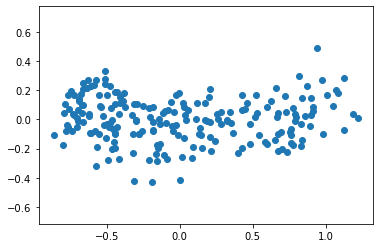

-1.0408340855860843e-16


In [44]:
# assigning the 0th column of pca_features to ' xs'
xs = pca_features[:,0]

# assigning the 1st column of pca_features to ' ys'
ys = pca_features[:,1]

plt.scatter(xs,ys)
plt.axis('equal')
plt.show()

# finding the correleation
correleation , pvalue = pearsonr(xs,ys)

# display the correleation
print(correleation)